In [1]:
import sys
import pandas as pd
import plotnine as pn

In [2]:
# load data

ratio_fns = {
    "-2": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_search/ratio=-2/means.csv",
    "-1": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_search/ratio=-1/means.csv",
    "0": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_search/ratio=0/means.csv",
    "1": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_search/ratio=1/means.csv",
    "2": "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_search/ratio=2/means.csv",
}

ratio_dataframes = {
    key: pd.read_csv(value) for key, value in ratio_fns.items()
}



In [3]:
# add ratio variable
for key in ratio_dataframes:
    df = ratio_dataframes[key]
    # df["ratio"] = 10 ** float(key)
    df["ratio"] = int(key)


# concat
ratio_data = pd.concat(ratio_dataframes.values())
ratio_data

,name,complexity,comm_cost,optimality,ratio
0,uegaki_true,33.127886,0.721208,0.813474,-2
1,uegaki_false,42.023380,0.610331,0.815996,-2
2,population_means,40.694142,0.626899,0.815619,-2
0,uegaki_true,33.127886,0.711356,0.809972,-1
1,uegaki_false,42.023380,0.599106,0.799102,-1
2,population_means,40.694142,0.615879,0.800726,-1
0,uegaki_true,33.127886,0.612831,0.811089,0
1,uegaki_false,42.023380,0.486856,0.788405,0
2,population_means,40.694142,0.505680,0.791795,0
0,uegaki_true,33.127886,0.862759,0.877588,1


In [4]:
# create a separate df for the population
population_data = ratio_data[ratio_data["name"] == "population_means"]

# remove population since is constant
ratio_data = ratio_data[ratio_data["name"].isin(["uegaki_true", "uegaki_false"])]

display(ratio_data)
display(population_data)

,name,complexity,comm_cost,optimality,ratio
0,uegaki_true,33.127886,0.721208,0.813474,-2
1,uegaki_false,42.023380,0.610331,0.815996,-2
0,uegaki_true,33.127886,0.711356,0.809972,-1
1,uegaki_false,42.023380,0.599106,0.799102,-1
0,uegaki_true,33.127886,0.612831,0.811089,0
1,uegaki_false,42.023380,0.486856,0.788405,0
0,uegaki_true,33.127886,0.862759,0.877588,1
1,uegaki_false,42.023380,0.836436,0.873214,1
0,uegaki_true,33.127886,0.887752,0.905759,2
1,uegaki_false,42.023380,0.871394,0.910904,2


,name,complexity,comm_cost,optimality,ratio
2,population_means,40.694142,0.626899,0.815619,-2
2,population_means,40.694142,0.615879,0.800726,-1
2,population_means,40.694142,0.505680,0.791795,0
2,population_means,40.694142,0.840369,0.873868,1
2,population_means,40.694142,0.873838,0.910135,2


In [5]:
# rename columns to more sensible labels
ratio_data["uegaki"] = ratio_data["name"] == "uegaki_true"

ratio_data = ratio_data[["ratio", "uegaki", "optimality"]].reset_index()
ratio_data = ratio_data.drop(columns=["index"])
ratio_data

/var/folders/3z/q1pyp9n929z2nh_1_69s7y_40000gn/T/ipykernel_18874/1431206993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ratio,uegaki,optimality
0,-2,True,0.813474
1,-2,False,0.815996
2,-1,True,0.809972
3,-1,False,0.799102
4,0,True,0.811089
5,0,False,0.788405
6,1,True,0.877588
7,1,False,0.873214
8,2,True,0.905759
9,2,False,0.910904


In [6]:
# rename to the Deontic Priority generalization
ratio_data["Deontic Priority"] = ratio_data["uegaki"]

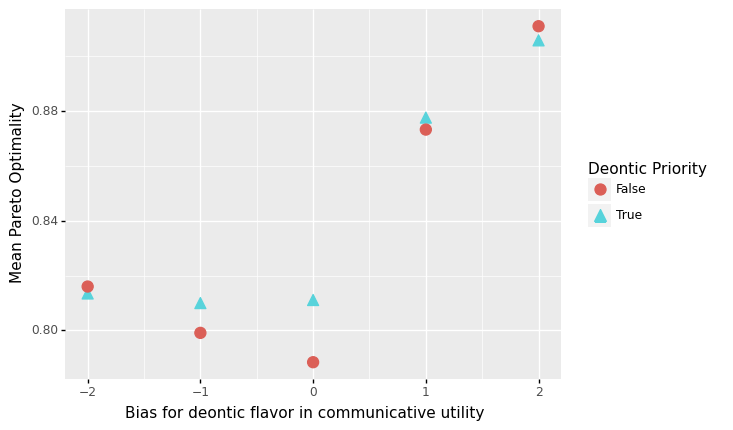

In [10]:
# get a basic plot

plot = (
    pn.ggplot(data=ratio_data, mapping=pn.aes(x="ratio", y="optimality"))
    + pn.geom_point(
        data=ratio_data,
        mapping=pn.aes(shape="Deontic Priority", color="Deontic Priority"),
        size=4,
    )
    + pn.xlab("Bias for deontic flavor in communicative utility")
    + pn.ylab("Mean Pareto Optimality")
)
print(plot)

In [11]:
# save
fn = "/Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_search/ratio_vs_opt.png"
plot.save(filename=fn, width=10, height=10, dpi=300)

/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 10 x 10 in image.
/Users/nathanielimel/miniforge3/envs/modals-effcomm/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: /Users/nathanielimel/clms/projects/modals-effcomm/outputs/cogsci/base/weighted_utility_search/ratio_vs_opt.png
